In [1]:
import pycaret
import pandas as pd

In [2]:
pycaret.__version__

'3.1.0'

In [3]:
df = pd.read_csv("./preprocessed_weatherAUS.csv")

In [4]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993,0.0,0.0
1,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,25.0,1010.6,1007.8,4.447461,4.50993,0.0,0.0
2,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,30.0,1007.6,1008.7,4.447461,2.00000,0.0,0.0
3,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,16.0,1017.6,1012.8,4.447461,4.50993,0.0,0.0
4,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.00000,0.0,0.0


In [5]:
data = df

In [7]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = "RainTomorrow", session_id = 123)

,Description,Value
0,Session id,123
1,Target,RainTomorrow
2,Target type,Binary
3,Original data shape,"(136653, 19)"
4,Transformed data shape,"(136653, 19)"
5,Transformed train set shape,"(95657, 19)"
6,Transformed test set shape,"(40996, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [8]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [9]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [10]:
exp.setup(data, target = "RainTomorrow", session_id = 123)

,Description,Value
0,Session id,123
1,Target,RainTomorrow
2,Target type,Binary
3,Original data shape,"(136653, 19)"
4,Transformed data shape,"(136653, 19)"
5,Transformed train set shape,"(95657, 19)"
6,Transformed test set shape,"(40996, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8581,0.8762,0.4904,0.7320,0.5873,0.5056,0.5204,0.7270
rf,Random Forest Classifier,0.8544,0.8720,0.4585,0.7352,0.5646,0.4828,0.5023,4.3290
et,Extra Trees Classifier,0.8539,0.8721,0.4426,0.7446,0.5551,0.4744,0.4975,2.7120
gbc,Gradient Boosting Classifier,0.8513,0.8625,0.4514,0.7225,0.5556,0.4719,0.4908,5.1830
ada,Ada Boost Classifier,0.8458,0.8522,0.4401,0.6999,0.5404,0.4535,0.4711,1.1920
lda,Linear Discriminant Analysis,0.8446,0.8533,0.4627,0.6808,0.5509,0.4611,0.4737,0.0850
lr,Logistic Regression,0.8434,0.8487,0.4273,0.6950,0.5291,0.4416,0.4604,2.0490
ridge,Ridge Classifier,0.8433,0.0000,0.3756,0.7339,0.4969,0.4153,0.4481,0.0460
knn,K Neighbors Classifier,0.8388,0.8038,0.4528,0.6580,0.5363,0.4428,0.4542,2.4260
nb,Naive Bayes,0.8048,0.8202,0.5722,0.5240,0.5470,0.4229,0.4236,0.0500


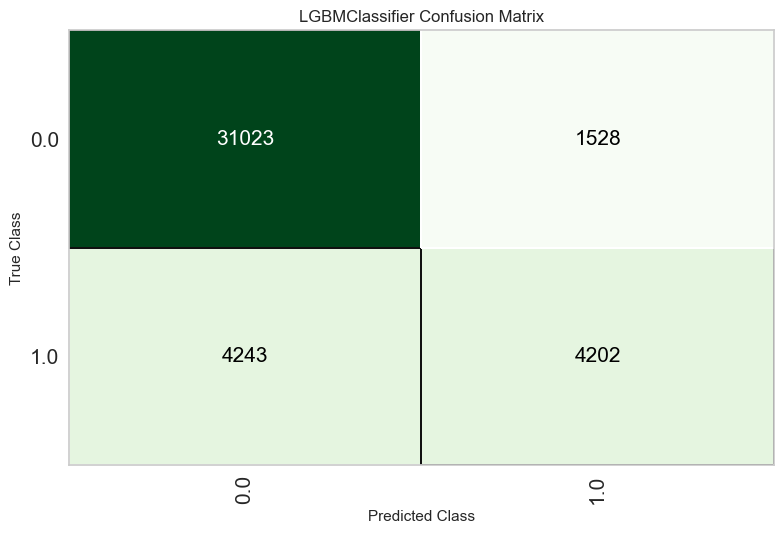

In [12]:
plot_model(best, plot = 'confusion_matrix')

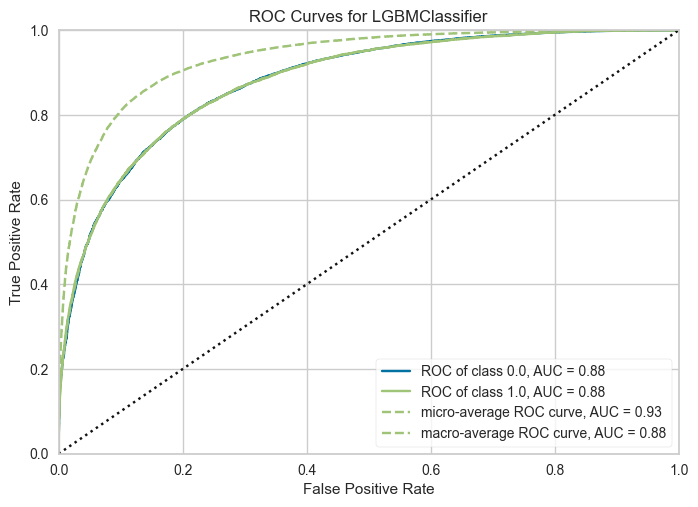

In [13]:
plot_model(best, plot = 'auc')

In [16]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8592,0.8798,0.4976,0.7333,0.5929,0.5115,0.5256


In [17]:
holdout_pred.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,prediction_label,prediction_score
88477,39,10.8,10.8,0.0,4.200000,10.700000,5,30.0,8,4,...,24.0,33.0,1018.200012,1015.099976,0.000000,0.00000,0.0,0.0,0,0.9881
48137,40,1.2,1.2,0.0,5.468232,7.611177,12,19.0,15,13,...,7.0,68.0,1029.199951,1024.699951,4.447461,4.50993,0.0,0.0,0,0.9031
117423,36,3.9,3.9,0.2,5.468232,7.611177,4,33.0,1,1,...,15.0,50.0,1017.649963,1015.255859,4.447461,4.50993,0.0,0.0,0,0.9237
127864,17,9.0,9.0,0.0,5.468232,7.611177,6,52.0,7,6,...,31.0,54.0,1017.649963,1015.255859,8.000000,8.00000,0.0,1.0,0,0.7034
63862,18,14.6,14.6,0.0,5.600000,11.100000,8,39.0,11,8,...,26.0,59.0,1009.700012,1010.099976,4.447461,4.50993,0.0,0.0,0,0.9503
